# Linar Regression House.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read the date

In [2]:
df=pd.read_csv("/home/ksiva/Downloads/USA_Housing.csv")
print(df.shape)
df.head()

(5000, 7)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Assigning independent and dependent variables

In [4]:
X=df['Avg. Area Income'].values
Y=df['Price'].values

In [6]:
X


array([79545.45857432, 79248.64245483, 61287.06717866, ...,
       63390.6868855 , 68001.33123509, 65510.58180367])

In [7]:
Y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

# Find mean values of Indipendent and dependent variables

In [9]:
mean_x=np.mean(X)
mean_y=np.mean(Y)
print(mean_x)
print(mean_y)

68583.10898395974
1232072.654142357


# For slope and y-intercept

In [10]:
n=len(X) #it shows number of rows
print(n)

5000


In [11]:
# formula for slope (x-mean_x)*(Y-mean_y)/(X-mean_x)(X-mean_x)
numer=0
denom=0
for i in range(n):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
m=numer/denom
c=mean_y-(m*mean_x)

#print coefficients
print(m,c)

21.1954831719317 -221579.4782059195


In [13]:
#above m,c will be added this equation
#Price= c+m*Avg. area Income

# Plotting Linear regression Line

In [14]:
#plotting values and Regression line
max_x = np.max(X)
min_x = np.min(X)
print(max_x)
print(min_x)

107701.748377639
17796.6311895434


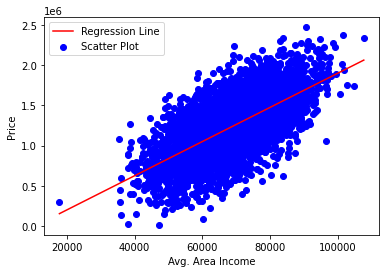

In [15]:
#calculating line values x and y
x=np.linspace(start=min_x,stop=max_x,num=1000)
y_pred = c+m*x

#plotting line
plt.plot(x,y_pred, color='Red', label='Regression Line')
#plotting scatter points
plt.scatter(X,Y, c='blue', label='Scatter Plot')

plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.legend()
plt.show()

# R Square Method - fit

we know R^2=1-((predicted value-mean value)^2/(actual value-mean value)^2))
here predicted value=Yp
mean value=mean_y
actual value=Y

# R square - Implementation using python

In [17]:
numerator = 0
denominator = 0
for i in range(n):
    y_pred = c + m *X[i]
    denominator += (Y[i]-mean_y) **2
    numerator += (y_pred-mean_y) **2
r2 = (numerator/denominator)
print(r2)

0.4092593070338849


# Linear Regression - Implementation using scikit learn

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#cannot use Rank 1 matrix in sklearn
X = X.reshape(-1,1)

#creating Model
reg = LinearRegression()
#Fitting training data
reg =reg.fit(X,Y)

#y prediction
Y_pred = reg.predict(X)

#calculating R2 score
r2_score = reg.score(X, Y)

print(r2_score)

0.4092593070338846
